## 1. Bibliotheken laden 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge ##L2
from sklearn.linear_model import Lasso ##L1
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean

#Quelle: (Cemurganci, 2021)

## 2. Daten einlesen und kennenlernen
Im diesem und folgenden Abschnitt werde ich mir die Datengrundlage etwas genauer ansehen. Insbesondere möchte ich die Qulität der Daten sicherstellen.

In [2]:
#Daten lesen und ausgeben, um sich ein erstes Bild zuverschaffen
bikes_data = pd.read_csv('Daten_8_Monate.csv')
bikes_data

,business_day,trips_count,monday,tuesday,wednesday,thursday,friday,saturday,sunday,public_holiday,...,fog,snow,cloudy,partly_cloudy,clear,avg_temp,avg_windspeed,avg_humidity,avg_visibility,num_row
0,2014-01-15,376,0,0,1,0,0,0,0,0,...,0,0,0,1,0,5.88,7.50,84.20,14.06,1
1,2014-01-15,6315,0,0,1,0,0,0,0,0,...,0,0,1,0,0,4.88,7.88,91.41,4.20,2
2,2014-01-15,7436,0,0,1,0,0,0,0,0,...,0,0,0,1,0,6.26,11.56,76.97,13.00,3
3,2014-01-15,7503,0,0,1,0,0,0,0,0,...,0,0,0,0,1,3.80,2.53,85.60,11.33,4
4,2014-01-16,443,0,0,0,1,0,0,0,0,...,0,0,1,0,0,4.42,8.97,80.21,9.33,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,2014-09-14,15001,0,0,0,0,0,0,1,0,...,0,0,0,1,0,19.73,4.82,42.45,16.00,972
972,2014-09-15,614,1,0,0,0,0,0,0,0,...,0,0,0,0,1,14.63,6.47,63.08,16.00,973
973,2014-09-15,10457,1,0,0,0,0,0,0,0,...,0,0,0,1,0,18.68,5.85,52.58,16.00,974
974,2014-09-15,10734,1,0,0,0,0,0,0,0,...,0,0,0,0,1,15.40,10.36,55.41,16.00,975


In [3]:
#Wie viele Zeilen und Spalten hat mein Datensatz?
bikes_data.shape

(976, 30)

In [4]:
#Damit ich die Datenqualität prüfen kann, schaue ich mir hier Informationen an (Insbesondere interessant ist die 
#Anzahl an non-null Werten und der Datentyp)
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   business_day      976 non-null    object 
 1   trips_count       976 non-null    int64  
 2   monday            976 non-null    int64  
 3   tuesday           976 non-null    int64  
 4   wednesday         976 non-null    int64  
 5   thursday          976 non-null    int64  
 6   friday            976 non-null    int64  
 7   saturday          976 non-null    int64  
 8   sunday            976 non-null    int64  
 9   public_holiday    976 non-null    int64  
 10  school_holiday    976 non-null    int64  
 11  season_winter     976 non-null    int64  
 12  season_spring     976 non-null    int64  
 13  season_summer     976 non-null    int64  
 14  season_autumn     976 non-null    int64  
 15  zerotosix         976 non-null    int64  
 16  sixtotwelve       976 non-null    int64  
 1

## 3 Datenüberprüfung/ Datenbereinigung

Wir sehen, dass wir keine Daten haben, die null sind. \
Es gilt aber noch zu prüfen, ob es vernünfitge Daten sind.
Nur weil sie nicht null sind, kann trotzdem etwas drin stehen, was nicht richtig ist. 
Zum Beispiel eine 3,14 bei einem Wochentag (sollte nur 0 oder 1 sein) oder 1234 Grad bei einer Temperatur

### 3.1 Prüfung der Tage

In [5]:
min_business_day = min(bikes_data['business_day'].unique())
max_business_day = max(bikes_data['business_day'].unique())
business_day = bikes_data['business_day'].unique()
print("\nDer\033[1m Datenzeitraum\033[0m geht von " + str(min_business_day) + " bis " + str(max_business_day) + "\n")
print(business_day)


Der Datenzeitraum geht von 2014-01-15 bis 2014-09-15

['2014-01-15' '2014-01-16' '2014-01-17' '2014-01-18' '2014-01-19'
 '2014-01-20' '2014-01-21' '2014-01-22' '2014-01-23' '2014-01-24'
 '2014-01-25' '2014-01-26' '2014-01-27' '2014-01-28' '2014-01-29'
 '2014-01-30' '2014-01-31' '2014-02-01' '2014-02-02' '2014-02-03'
 '2014-02-04' '2014-02-05' '2014-02-06' '2014-02-07' '2014-02-08'
 '2014-02-09' '2014-02-10' '2014-02-11' '2014-02-12' '2014-02-13'
 '2014-02-14' '2014-02-15' '2014-02-16' '2014-02-17' '2014-02-18'
 '2014-02-19' '2014-02-20' '2014-02-21' '2014-02-22' '2014-02-23'
 '2014-02-24' '2014-02-25' '2014-02-26' '2014-02-27' '2014-02-28'
 '2014-03-01' '2014-03-02' '2014-03-03' '2014-03-04' '2014-03-05'
 '2014-03-06' '2014-03-07' '2014-03-08' '2014-03-09' '2014-03-10'
 '2014-03-11' '2014-03-12' '2014-03-13' '2014-03-14' '2014-03-15'
 '2014-03-16' '2014-03-17' '2014-03-18' '2014-03-19' '2014-03-20'
 '2014-03-21' '2014-03-22' '2014-03-23' '2014-03-24' '2014-03-25'
 '2014-03-26' '2014-0

### 3.2 Prüfung Anzahl der Fahrten und Zeilennummer

Da ich den Datentype schon vorher geprüft habe und es sich bei diesen Variablen um int64 handelt,
werde ich nur die niedrigsten und höchten Werte kontrollieren. Alles dazwischen sehe aufgrund des Datentyps 
und des dadurch entstehenden Intervalls als realistisch an.

In [6]:
min_trips = min(bikes_data['trips_count'].unique())
max_trips = max(bikes_data['trips_count'].unique())
print("Die niedrigste\033[1m Anzahl an Fahrten\033[0m ist " + str(min_trips))
print("Die höchste\033[1m Anzahl an Fahrten\033[0m ist " + str(max_trips))

min_row = min(bikes_data['num_row'].unique())
max_row = max(bikes_data['num_row'].unique())
print("\nDie niedrigste\033[1m Zeilennummer\033[0m ist " + str(min_row))
print("Die höchste\033[1m Zeilennummer\033[0m ist " + str(max_row))

Die niedrigste Anzahl an Fahrten ist 24
Die höchste Anzahl an Fahrten ist 16373

Die niedrigste Zeilennummer ist 1
Die höchste Zeilennummer ist 976


### 3.3 Prüfung Wochentage & Feiertage

In [7]:
for idx , col_name in enumerate(bikes_data.columns[2:11]):
    print("{} {}"
          .format(col_name, bikes_data[col_name].unique()))

monday [0 1]
tuesday [0 1]
wednesday [1 0]
thursday [0 1]
friday [0 1]
saturday [0 1]
sunday [0 1]
public_holiday [0 1]
school_holiday [0 1]


### 3.4 Prüfung Jahreszeiten

In [8]:
for idx , col_name in enumerate(bikes_data.columns[11:15]):
    print("{} {}"
          .format(col_name, bikes_data[col_name].unique()))

season_winter [1 0]
season_spring [0 1]
season_summer [0 1]
season_autumn [0 1]


### 3.5 Prüfung Tageszeiten

In [9]:
for idx , col_name in enumerate(bikes_data.columns[15:19]):
    print("{} {}"
          .format(col_name, bikes_data[col_name].unique()))

zerotosix [1 0]
sixtotwelve [0 1]
twelvetoeighteen [0 1]
eighteentozero [0 1]


### 3.6 Prüfung Wetter

In [10]:
for idx , col_name in enumerate(bikes_data.columns[19:25]):
    print("{} {}"
          .format(col_name, bikes_data[col_name].unique()))
    
#Quelle: (edureka!, 2022)

rain [0 1]
fog [0]
snow [0 1]
cloudy [0 1]
partly_cloudy [1 0]
clear [0 1]


### 3.7 Prüfung Temperatur, Windgeschwindkeit, Luftfeuchtigkeit und Sichtweite

Da ich den Datentype schon vorher geprüft habe und es sich bei diesen Variablen um float64 handelt,
werde ich nur die niedrigsten und höchten Werte kontrollieren. Alles dazwischen sehe aufgrund des Datentyps 
und des dadurch entstehenden Intervalls als realistisch an.

In [11]:
min_temp = min(bikes_data['avg_temp'].unique())
max_temp = max(bikes_data['avg_temp'].unique())
print("\nDie niedrigste\033[1m Temperatur\033[0m ist " + str(min_temp))
print("Die höchste\033[1m Temperatur\033[0m ist " + str(max_temp))

min_wind = min(bikes_data['avg_windspeed'].unique())
max_wind = max(bikes_data['avg_windspeed'].unique())
print("\nDie niedrigste\033[1m Windgeschwindigtkeit\033[0m ist " + str(min_wind))
print("Die höchste\033[1m Windgeschwindigkeit\033[0m ist " + str(max_wind))

min_humidity = min(bikes_data['avg_humidity'].unique())
max_humidity = max(bikes_data['avg_humidity'].unique())
print("\nDie niedrigste\033[1m Luftfeuchtigkeit\033[0m ist " + str(min_humidity))
print("Die höchste\033[1m Luftfeuchtigkeit\033[0m ist " + str(max_humidity))

min_vis = min(bikes_data['avg_visibility'].unique())
max_vis = max(bikes_data['avg_visibility'].unique())
print("\nDie niedrigste\033[1m Sichtweite\033[0m ist " + str(min_vis))
print("Die höchste\033[1m Sichtweite\033[0m ist " + str(max_vis))


Die niedrigste Temperatur ist -13.13
Die höchste Temperatur ist 32.18

Die niedrigste Windgeschwindigtkeit ist 0.0
Die höchste Windgeschwindigkeit ist 38.38

Die niedrigste Luftfeuchtigkeit ist 15.69
Die höchste Luftfeuchtigkeit ist 94.64

Die niedrigste Sichtweite ist 0.0
Die höchste Sichtweite ist 16.0


## 4. Daten vorbereiten

In [12]:
#Zur Veranschaulichung
bike1 = bikes_data.corr().T
bike1.head()

,trips_count,monday,tuesday,wednesday,thursday,friday,saturday,sunday,public_holiday,school_holiday,...,fog,snow,cloudy,partly_cloudy,clear,avg_temp,avg_windspeed,avg_humidity,avg_visibility,num_row
trips_count,1.000000,0.018295,0.031137,0.024342,0.031150,0.011913,-0.054887,-0.061575,-0.039996,0.204942,...,NaN,-0.137608,-0.087735,0.280579,-0.058105,0.592991,-0.091722,-0.247014,0.231416,4.583136e-01
monday,0.018295,1.000000,-0.164661,-0.167464,-0.167464,-0.167464,-0.167464,-0.167464,0.209839,0.065197,...,NaN,0.003448,-0.049173,-0.022267,0.081163,0.019487,0.007513,-0.075832,0.058821,1.452452e-02
tuesday,0.031137,-0.164661,1.000000,-0.164661,-0.164661,-0.164661,-0.164661,-0.164661,-0.069152,0.025178,...,NaN,0.030674,-0.071971,0.060663,0.003868,0.017364,-0.011591,0.001442,-0.006236,1.492286e-18
wednesday,0.024342,-0.167464,-0.164661,1.000000,-0.167464,-0.167464,-0.167464,-0.167464,-0.070329,-0.008225,...,NaN,0.028946,0.056445,-0.022267,-0.047672,-0.024629,0.041121,0.088159,-0.053892,-1.452452e-02
thursday,0.031150,-0.167464,-0.164661,-0.167464,1.000000,-0.167464,-0.167464,-0.167464,-0.000287,-0.008225,...,NaN,0.003448,0.049404,-0.022267,-0.029267,-0.035382,0.034250,0.047928,-0.067215,-8.714714e-03


In [13]:
#y ist unsere abhängige Variable, x sind unsere unabhänigen Variablen
bikes_new = bikes_data.drop('business_day', axis=1)
x = bikes_new.drop('trips_count', axis = 1)
y = bikes_data[['trips_count']]

#Quelle: (edureka!, 2022)

### 4.1 Train-Test Split

Wie im Data Science Bereich üblich, werden die Fahrraddaten in Test- und Trainingsdaten gesplittet. In diesem Fall sind die Testdaten 5.5% und spiegeln unsere Prognosedaten wieder. 

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.055, shuffle = False)

#Quelle: (Train-Test-Split, o.J.)

In [15]:
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

#Quelle: (edureka!, 2022)

x_train (922, 28)
x_test (54, 28)
y_train (922, 1)
y_test (54, 1)


## 5. Regressionen

### 5.1 Lineare Regression

In [16]:
#Lineare Regression definieren und trainieren
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

#Koeffizienten ausgeben
print("Folgendes gilt für die Lineare Regression:\n")
for idx , col_name in enumerate(x_train.columns):
    print("Der Koeffizient für \033[1m{}\033[0m ist: {}".format(col_name, round(regression_model.coef_[0][idx],3)))

#Quelle: (edureka!, 2022)

Folgendes gilt für die Lineare Regression:

Der Koeffizient für monday ist: 58.644
Der Koeffizient für tuesday ist: 228.241
Der Koeffizient für wednesday ist: 547.306
Der Koeffizient für thursday ist: 666.902
Der Koeffizient für friday ist: 314.521
Der Koeffizient für saturday ist: -739.223
Der Koeffizient für sunday ist: -1076.391
Der Koeffizient für public_holiday ist: -863.778
Der Koeffizient für school_holiday ist: -547.62
Der Koeffizient für season_winter ist: 422.992
Der Koeffizient für season_spring ist: 675.635
Der Koeffizient für season_summer ist: 399.585
Der Koeffizient für season_autumn ist: -1498.211
Der Koeffizient für zerotosix ist: -4451.645
Der Koeffizient für sixtotwelve ist: 1258.93
Der Koeffizient für twelvetoeighteen ist: 2620.637
Der Koeffizient für eighteentozero ist: 572.078
Der Koeffizient für rain ist: -1299.701
Der Koeffizient für fog ist: 0.0
Der Koeffizient für snow ist: 187.114
Der Koeffizient für cloudy ist: 301.449
Der Koeffizient für partly_cloudy ist: 

In [17]:
#Regressionskonstane der linearen Regression
intercept = regression_model.intercept_[0]
print("Die Regressionskonstante für unser lineares Modell ist {}".format(intercept))

#Quelle: (edureka!, 2022)

Die Regressionskonstante für unser lineares Modell ist 3173.370162641318


### 5.2 Ridge Regression

#### 5.2.1 Das beste Alpha finden

In [18]:
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

# Liste der Aplhas, die getestet werden sollen
alphas = [0.01, 0.05, 0.1, 0.5, 1, 2, 5, 8, 10, 11, 12, 13, 14, 14.25, 14.5, 14.75, 15, 20, 25, 30, 50, 70, 100, 200, 500, 1000, 10000000]

# Das anfängliche Minimum MSE auf einen großen Wert setzen
min_mse = float("inf")

# Den anfänglichen besten Alphawert auf None setzen
best_alpha = None

# Eine leere Liste erstellen, um die Ergebnisse zu speichern
results = []

# Iterieren über die Liste der Alphawerte
for alpha in alphas:
  model = Ridge(alpha=alpha)
  model.fit(x_train, y_train)
  predictions = model.predict(x_test)

  # Den MSE berechnen
  mse = round(mean_squared_error(y_test, predictions),2)
  
  # Die minimale MSE und den besten Alpha-Wert aktualisieren, wenn die aktuelle MSE kleiner ist
  if mse < min_mse:
    min_mse = mse
    best_alpha = alpha
    
  results.append(("Alpha: " + str(alpha), "MSE: " + str(mse)))


# Die Ergebnisse ordentlich in zwei Spalten ausgeben
print(tabulate(results, headers=["\033[1mAlpha:\033[0m", "\033[1mMSE:\033[0m"]))

#Bestes Alpha und kleinsten MSE (dickgedruckt) ausgeben 
print("\n\033[1mBest alpha:\033[0m", best_alpha)
print("\033[1mMinimum MSE:\033[0m", min_mse)

#Quellen: (GeeksforGeeks, 2019); (Cemurganci, 2021)

Alpha:           MSE:
---------------  ----------------
Alpha: 0.01      MSE: 7927816.56
Alpha: 0.05      MSE: 7891871.14
Alpha: 0.1       MSE: 7847929.44
Alpha: 0.5       MSE: 7532061.04
Alpha: 1         MSE: 7210671.82
Alpha: 2         MSE: 6739102.96
Alpha: 5         MSE: 6022031.5
Alpha: 8         MSE: 5738991.68
Alpha: 10        MSE: 5650469.69
Alpha: 11        MSE: 5623707.8
Alpha: 12        MSE: 5605526.38
Alpha: 13        MSE: 5594311.89
Alpha: 14        MSE: 5588821.12
Alpha: 14.25     MSE: 5588223.96
Alpha: 14.5      MSE: 5587909.76
Alpha: 14.75     MSE: 5587866.23
Alpha: 15        MSE: 5588081.75
Alpha: 20        MSE: 5633323.2
Alpha: 25        MSE: 5726562.32
Alpha: 30        MSE: 5844194.11
Alpha: 50        MSE: 6399227.34
Alpha: 70        MSE: 6971251.98
Alpha: 100       MSE: 7774873.07
Alpha: 200       MSE: 9880506.2
Alpha: 500       MSE: 13159676.25
Alpha: 1000      MSE: 15241606.34
Alpha: 10000000  MSE: 23290773.86

Best alpha: 14.75
Minimum MSE: 5587866.23


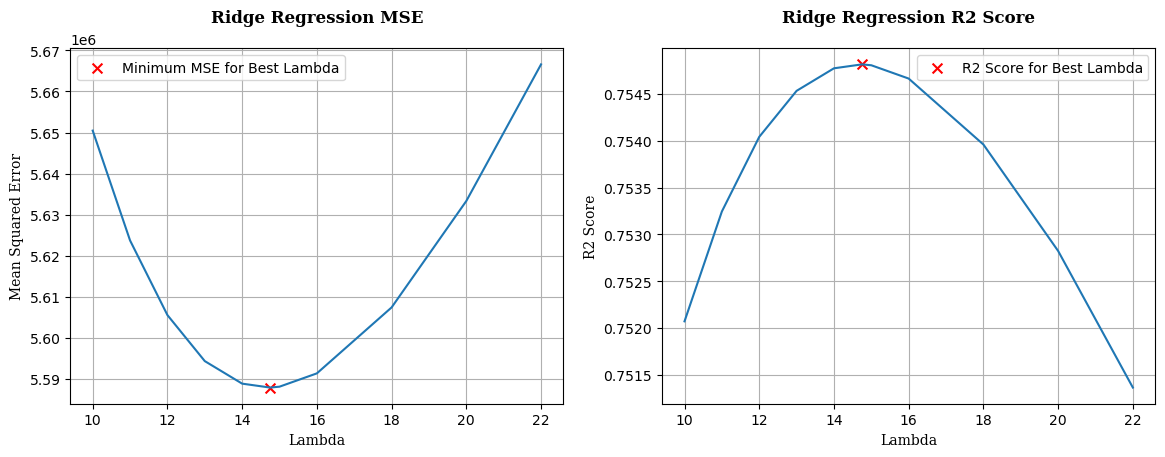

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

#Vorgehen ähnlich wie 5.1

#Alphas werden so gewählt, dass der Plot unten gut erkennbar ist (um das beste Alpha herum)
alphas = [10, 11, 12, 13, 14, 14.75, 15, 16, 18, 20, 22]

mse_values = []
r2_values = []

for alpha in alphas:
  model = Ridge(alpha=alpha)
  model.fit(x_train, y_train)
  predictions = model.predict(x_test)

  mse = mean_squared_error(y_test, predictions)
  r2 = model.score(x_test, y_test)

  mse_values.append(mse)
  r2_values.append(r2)


#plotten
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4.5))
ax1.plot(alphas, mse_values)
ax1.set_xlabel('Lambda', fontsize=10, fontfamily='serif')
ax1.set_ylabel('Mean Squared Error', fontsize=10, fontfamily='serif')
ax1.set_title('Ridge Regression MSE')

ax2.plot(alphas, r2_values)
ax2.set_xlabel('Lambda', fontsize=10, fontfamily='serif')
ax2.set_ylabel('R2 Score', fontsize=10, fontfamily='serif')
ax2.set_title('Ridge Regression R2 Score')

# Zur Veranschaulichung auch noch ein roten Punkt beim Minimum bzw. Maximum
min_index = np.argmin(mse_values)
alpha_min = alphas[min_index]
r2_min = r2_values[min_index]

# Ein paar Details für den Plot, um ihn anschaulicher zu gestalten
ax1.grid(True)
ax2.grid(True)
ax1.scatter(alpha_min, mse_values[min_index], c='r', s=50, marker='x', label='Minimum MSE for Best Lambda')
ax2.scatter(alpha_min, r2_min, c='r', s=50, marker='x', label='R2 Score for Best Lambda')
ax1.legend()
ax2.legend()

ax1.set_title('Ridge Regression MSE', fontsize=12, fontweight='bold', fontfamily='serif', y=1.05)
ax2.set_title('Ridge Regression R2 Score', fontsize=12, fontweight='bold', fontfamily='serif', y=1.05)
plt.subplots_adjust(top=0.9)

plt.show()

#Quellen: (GeeksforGeeks, 2019); (Cemurganci, 2021)

#### 5.2.2 Koeffizienten vergleichen

In [20]:
#Ridge mit dem optimalen Alpha trainieren
ridge = Ridge(alpha = 14.75)
ridge.fit(x_train,y_train)

#Koeffizienten ausgeben
print("Folgendes gilt für die Ridge Regression:\n")
for idx , col_name in enumerate(x_train.columns):
    print("Der Koeffizient für \033[1m{}\033[0m ist: {}".format(col_name, round(ridge.coef_[0][idx],3)))
    
#Quelle: (edureka!, 2022)

Folgendes gilt für die Ridge Regression:

Der Koeffizient für monday ist: -4.302
Der Koeffizient für tuesday ist: 207.232
Der Koeffizient für wednesday ist: 520.651
Der Koeffizient für thursday ist: 614.398
Der Koeffizient für friday ist: 280.949
Der Koeffizient für saturday ist: -660.638
Der Koeffizient für sunday ist: -958.29
Der Koeffizient für public_holiday ist: -653.652
Der Koeffizient für school_holiday ist: -481.694
Der Koeffizient für season_winter ist: 26.507
Der Koeffizient für season_spring ist: 279.953
Der Koeffizient für season_summer ist: 173.954
Der Koeffizient für season_autumn ist: -480.414
Der Koeffizient für zerotosix ist: -4115.625
Der Koeffizient für sixtotwelve ist: 1242.034
Der Koeffizient für twelvetoeighteen ist: 2360.401
Der Koeffizient für eighteentozero ist: 513.191
Der Koeffizient für rain ist: -985.757
Der Koeffizient für fog ist: 0.0
Der Koeffizient für snow ist: 118.662
Der Koeffizient für cloudy ist: 295.238
Der Koeffizient für partly_cloudy ist: 443.3

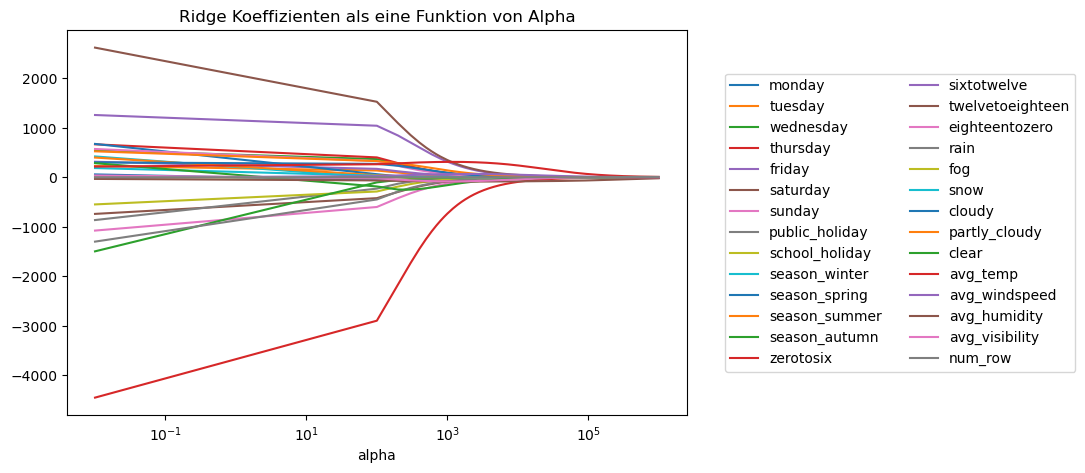

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# Größe des Plots definieren
plt.figure(figsize=(8, 5))

# Axen definieren
ax = plt.gca()

# Alphas definieren
alphas = np.linspace(0.01, 1000000, 10000)

ridge_plot = Ridge(max_iter=10000)

# Erstellen einer Liste zum Speichern der Koeffizienten
coefs = []

# Anpassen des Modells und Speichern der Koeffizienten
for alpha in alphas:
    ridge_plot.set_params(alpha=alpha)
    ridge_plot.fit(x_train, y_train)
    coefs.append(ridge_plot.coef_)

# Umwandlung der Liste in ein Numpy-Array
coefs = np.array(coefs)
coefs = coefs.squeeze()

for i in range(coefs.shape[1]):
    ax.plot(alphas, coefs[:,i], label=x.columns[i])

# Die x-Achse auf logarithmische Skala einstellen
ax.set_xscale('log')

# Legende formatieren
plt.legend(x.columns, ncol=2, bbox_to_anchor=(1.05, 0.5), loc="center left")

plt.axis('tight')
plt.xlabel('alpha')
plt.title('Ridge Koeffizienten als eine Funktion von Alpha');

#Quelle: (Crouser, 2016); (Pedregosa, o. J.)

### 5.3 Lasso Regression

#### 5.3.1 Das beste Alpha finden

In [22]:
from sklearn.metrics import mean_squared_error
from tabulate import tabulate

# Liste der Aplhas, die getestet werden sollen
alphas = [0.01, 0.05, 0.1, 0.5, 2, 5, 8, 10, 11, 12, 12.25, 12.5, 13, 15, 20, 25, 30, 50, 70, 100, 200, 500, 1000, 10000000]

# Das anfängliche Minimum MSE auf einen großen Wert setzen
min_mse = float("inf")

# Den anfänglichen besten Alphawert auf None setzen
best_alpha = None

# Eine leere Liste erstellen, um die Ergebnisse zu speichern
results = []

# Iterieren über die Liste der Alphawerte
for alpha in alphas:
  model = Lasso(alpha=alpha)
  model.fit(x_train, y_train)
  predictions = model.predict(x_test)

  # Den MSE berechnen
  mse = round(mean_squared_error(y_test, predictions),2)
  
  # Die minimale MSE und den besten Alpha-Wert aktualisieren, wenn die aktuelle MSE kleiner ist
  if mse < min_mse:
    min_mse = mse
    best_alpha = alpha
    
  results.append(("Alpha: " + str(alpha), "MSE: " + str(mse)))


# Die Ergebnisse ordentlich in zwei Spalten ausgeben
print(tabulate(results, headers=["\033[1mAlpha:\033[0m", "\033[1mMSE:\033[0m"]))

#Bestes Alpha und kleinsten MSE (dickgedruckt) ausgeben 
print("\n\033[1mBest alpha:\033[0m", best_alpha)
print("\033[1mMinimum MSE:\033[0m", min_mse)

#Quellen: (GeeksforGeeks, 2019); (Cemurganci, 2021)

/Users/celine/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.473e+08, tolerance: 1.842e+06
  model = cd_fast.enet_coordinate_descent(
/Users/celine/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.839e+07, tolerance: 1.842e+06
  model = cd_fast.enet_coordinate_descent(
/Users/celine/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularis

Alpha:           MSE:
---------------  ----------------
Alpha: 0.01      MSE: 7931726.47
Alpha: 0.05      MSE: 7911347.83
Alpha: 0.1       MSE: 7885876.61
Alpha: 0.5       MSE: 7681407.71
Alpha: 2         MSE: 6961754.03
Alpha: 5         MSE: 5805339.02
Alpha: 8         MSE: 5023585.68
Alpha: 10        MSE: 4710592.15
Alpha: 11        MSE: 4616360.73
Alpha: 12        MSE: 4563444.19
Alpha: 12.25     MSE: 4556736.87
Alpha: 12.5      MSE: 4559415.76
Alpha: 13        MSE: 4565261.19
Alpha: 15        MSE: 4588777.02
Alpha: 20        MSE: 4649493.83
Alpha: 25        MSE: 4714748.95
Alpha: 30        MSE: 4784557.87
Alpha: 50        MSE: 5162248.77
Alpha: 70        MSE: 5682128.53
Alpha: 100       MSE: 6354011.93
Alpha: 200       MSE: 7555195.45
Alpha: 500       MSE: 11201540.41
Alpha: 1000      MSE: 18608608.8
Alpha: 10000000  MSE: 29081995.78

Best alpha: 12.25
Minimum MSE: 4556736.87


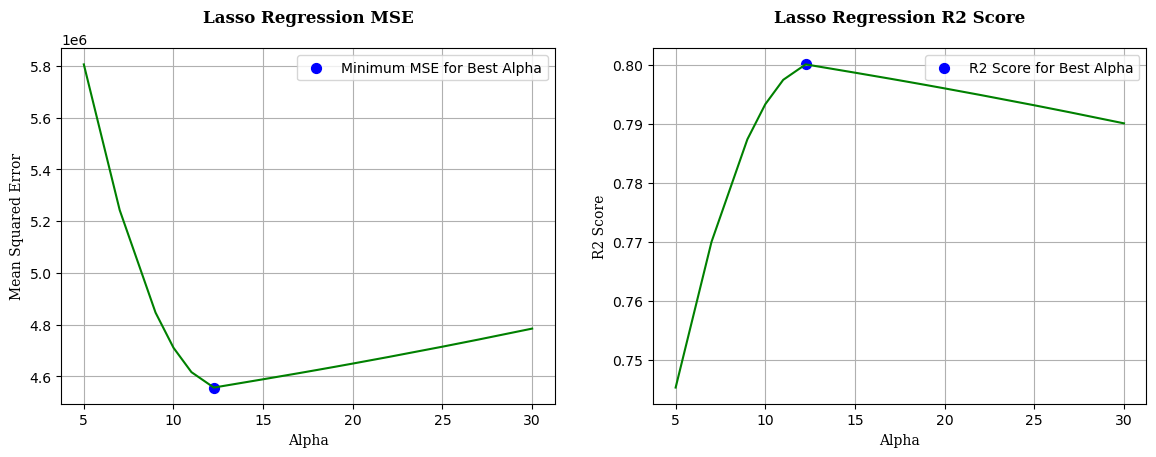

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

##Vorgehen ähnlich wie 5.1

##Alphas werden so gewählt, dass der Plot unten gut erkennbar ist (um das beste Alpha herum)
alphas = [5, 7, 9, 10, 11, 12.25, 15, 17, 18, 19, 20, 22, 25, 27, 30]

mse_values = []
r2_values = []

for alpha in alphas:
  model = Lasso(alpha=alpha)
  model.fit(x_train, y_train)
  predictions = model.predict(x_test)

  mse = mean_squared_error(y_test, predictions)
  r2 = model.score(x_test, y_test)

  mse_values.append(mse)
  r2_values.append(r2)


##plotten
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4.5))
ax1.plot(alphas, mse_values, color ='green')
ax1.set_xlabel('Alpha', fontsize=10, fontfamily='serif')
ax1.set_ylabel('Mean Squared Error', fontsize=10, fontfamily='serif')
ax1.set_title('Lasso Regression MSE')

ax2.plot(alphas, r2_values, color ='green')
ax2.set_xlabel('Alpha', fontsize=10, fontfamily='serif')
ax2.set_ylabel('R2 Score', fontsize=10, fontfamily='serif')
ax2.set_title('Lasso Regression R2 Score')

# Zur Veranschaulichung auch noch ein roten Punkt beim Minimum bzw. Maximum
min_index = np.argmin(mse_values)
alpha_min = alphas[min_index]
r2_min = r2_values[min_index]

## Ein paar Details für den Plot, um ihn anschaulicher zu gestalten
ax1.grid(True)
ax2.grid(True)
ax1.scatter(alpha_min, mse_values[min_index], c='b', s=50, label='Minimum MSE for Best Alpha')
ax2.scatter(alpha_min, r2_min, c='b', s=50, label='R2 Score for Best Alpha')
ax1.legend()
ax2.legend()

ax1.set_title('Lasso Regression MSE', fontsize=12, fontweight='bold', fontfamily='serif', y=1.05)
ax2.set_title('Lasso Regression R2 Score', fontsize=12, fontweight='bold', fontfamily='serif', y=1.05)
plt.subplots_adjust(top=0.9)

plt.show()

#Quellen: (GeeksforGeeks, 2019); (Cemurganci, 2021)

In [24]:
#Lasso mit dem optimalen Alpha trainieren
lasso = Lasso(alpha = 12.25)
lasso.fit(x_train,y_train)

#und Koeffizienten ausgeben
print("Folgendes gilt für die Lasso Regression:\n")
for i, col in enumerate(x_train.columns):
    print ("Der Koeffizient für \033[1m{}\033[0m ist: {}".format(col, round(lasso.coef_[i],3)))
    
#Quelle: (edureka!, 2022)

Folgendes gilt für die Lasso Regression:

Der Koeffizient für monday ist: -149.118
Der Koeffizient für tuesday ist: 0.0
Der Koeffizient für wednesday ist: 262.585
Der Koeffizient für thursday ist: 377.818
Der Koeffizient für friday ist: 18.138
Der Koeffizient für saturday ist: -858.512
Der Koeffizient für sunday ist: -1196.228
Der Koeffizient für public_holiday ist: -713.453
Der Koeffizient für school_holiday ist: -482.728
Der Koeffizient für season_winter ist: -0.0
Der Koeffizient für season_spring ist: 198.935
Der Koeffizient für season_summer ist: 0.0
Der Koeffizient für season_autumn ist: -1.024
Der Koeffizient für zerotosix ist: -5478.382
Der Koeffizient für sixtotwelve ist: 150.204
Der Koeffizient für twelvetoeighteen ist: 1480.113
Der Koeffizient für eighteentozero ist: -470.932
Der Koeffizient für rain ist: -1296.656
Der Koeffizient für fog ist: 0.0
Der Koeffizient für snow ist: -0.0
Der Koeffizient für cloudy ist: 0.0
Der Koeffizient für partly_cloudy ist: 178.163
Der Koeffizi

/Users/celine/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.824e+07, tolerance: 1.842e+06
  model = cd_fast.enet_coordinate_descent(


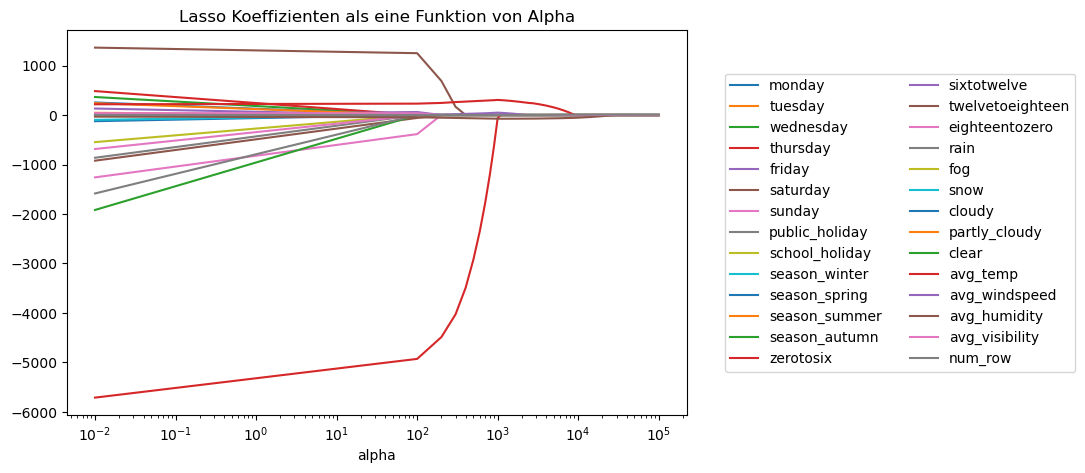

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

#Selbe Vorhergehensweise wie bei den Ridge Koeffizienten
plt.figure(figsize=(8, 5))

ax = plt.gca()

alphas = np.linspace(0.01, 100000, 1000)

lasso_plot = Lasso(max_iter=10000)

coefs = []

for alpha in alphas:
    lasso_plot.set_params(alpha=alpha)
    lasso_plot.fit(x_train, y_train)
    coefs.append(lasso_plot.coef_)

coefs = np.array(coefs)

ax.plot(alphas, coefs)

ax.set_xscale('log')

plt.legend(x.columns, ncol=2, bbox_to_anchor=(1.05, 0.5), loc="center left")
plt.axis('tight')
plt.xlabel('alpha')
plt.title('Lasso Koeffizienten als eine Funktion von Alpha');

#Quelle: (Crouser, 2016); (Pedregosa, o. J.)

### 5.4 Test-Ergebnisse im Vergleich 

In [26]:
#Vorhersagen machen
predictions_linear = regression_model.predict(x_test)
predictions_ridge = ridge.predict(x_test)
predictions_lasso = lasso.predict(x_test)

In [27]:
#Damit ich auf das Datum zugreifen kann in folgender Tabelle
tage = bikes_data[922:976]

In [28]:
#Damit die Ergebnisse zwilenweise vergleichen werden können berechne ich diese Differenzen
difference_results_1 = np.subtract(np.round(predictions_linear).transpose(),
                                   y_test.values.transpose()).transpose()
difference_results_2 = np.subtract(np.round(predictions_ridge).transpose(),
                                   y_test.values.transpose()).transpose()
difference_results_3 = np.subtract(np.round(predictions_lasso).transpose(),
                                   y_test.values.transpose()).transpose()

#Dient zur Orientierung für die Vorhersagen; für welche Tageszeit sie gemacht wurden
daytime = ["12 bis 18 Uhr","18 bis 0 Uhr","0 bis 6 Uhr","6 bis 12 Uhr"]*13 + ["12 bis 18 Uhr","18 bis 0 Uhr"]
    
#Spalten definieren    
results_prediction = np.column_stack((tage['business_day'],
                                      daytime,
                                      y_test,
                                      np.round(predictions_linear), 
                                      difference_results_1,
                                      np.round(predictions_ridge),
                                      difference_results_2,
                                      np.round(predictions_lasso),
                                      difference_results_3))

#Information ausgeben
print("\n\033[1mInformation:\033[0m In der folgenden Tabelle bedeutet Diff die Differenz" 
      " zwischen den gemachten Fahrten (1) und der jeweils zuvor genannten Vorhersage (2) \nBerechnung: (2)-(1)\n\n")

#Fertige Tabelle ausgeben
print(tabulate(results_prediction, 
               headers=["\033[1mDatum\033[0m\n",
                        "\033[1mTageszeit\033[0m\n",
                        "\033[1mGemachte\033[0m\n \033[1mFahrten\033[0m",
                        "\033[1mVorhersage\033[0m\n \033[1mLinearR\033[0m", 
                        "\nDiff.",
                        "\033[1mVorhersage\033[0m\n \033[1mRidgeR\033[0m", 
                        "\nDiff.",
                        "\033[1mVorhersage\033[0m\n \033[1mLassoR\033[0m",
                        "\nDiff."]))


Information: In der folgenden Tabelle bedeutet Diff die Differenz zwischen den gemachten Fahrten (1) und der jeweils zuvor genannten Vorhersage (2) 
Berechnung: (2)-(1)


Datum       Tageszeit        Gemachte    Vorhersage             Vorhersage             Vorhersage
                              Fahrten       LinearR    Diff.        RidgeR    Diff.        LassoR    Diff.
----------  -------------  ----------  ------------  -------  ------------  -------  ------------  -------
2014-09-02  12 bis 18 Uhr        9780          8870     -910         10055      275         10809     1029
2014-09-02  18 bis 0 Uhr        10903         11505      602         12575     1672         13289     2386
2014-09-03  0 bis 6 Uhr           712          2406     1694          3784     3072          4241     3529
2014-09-03  6 bis 12 Uhr        11036          8284    -2752          9377    -1659         10143     -893
2014-09-03  12 bis 18 Uhr       11332          8188    -3144          9282    -2050     

In [29]:
# Baufbau der Wörter zum Vergleich der Ergebnisse
results_train = {}
results_train['Linear Regression'] = regression_model.score(x_train,y_train)
results_train['Ridge Regression'] = ridge.score(x_train,y_train)
results_train['Lasso Regression'] = lasso.score(x_train,y_train)   

for model, score in results_train.items():
    print('Das Ergebnis der Performance der Trainingsdaten für die ' 
          + str(model)+ ' ist: ' +str(round(score*100,2)) + '%')

print()    

results_test = {}
results_test['Linear Regression'] = regression_model.score(x_test,y_test)
results_test['Ridge Regression'] = ridge.score(x_test,y_test)
results_test['Lasso Regression'] = lasso.score(x_test,y_test)
 
for model, score in results_test.items():
    print('Das Ergebnis der Performance der Testdaten für die ' 
          + str(model)+ ' ist: ' +str(round(score*100,2)) + '%')
    
#Quelle: (edureka!, 2022); (Jahangiry, 2021)

Das Ergebnis der Performance der Trainingsdaten für die Linear Regression ist: 82.86%
Das Ergebnis der Performance der Trainingsdaten für die Ridge Regression ist: 82.58%
Das Ergebnis der Performance der Trainingsdaten für die Lasso Regression ist: 82.66%

Das Ergebnis der Performance der Testdaten für die Linear Regression ist: 65.17%
Das Ergebnis der Performance der Testdaten für die Ridge Regression ist: 75.48%
Das Ergebnis der Performance der Testdaten für die Lasso Regression ist: 80.01%


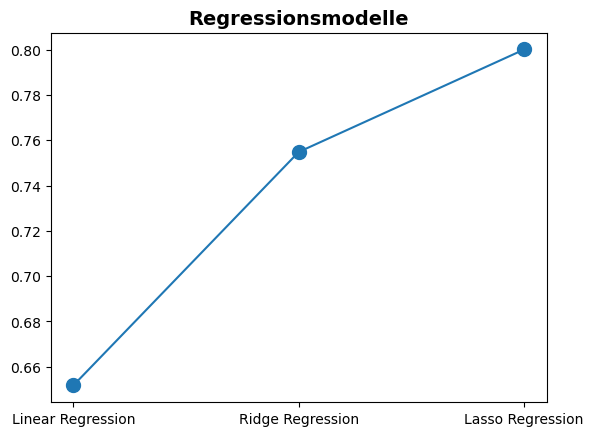

In [30]:
##Die Ergebnisse plotten
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
scores = [regression_model.score(x_test,y_test),
         ridge.score(x_test,y_test),
         lasso.score(x_test,y_test)]

plt.title('Regressionsmodelle', fontsize=14, fontweight='bold')
plt.plot(models, scores, marker='o', markersize=10)

plt.show()

In [31]:
import pandas as pd

# Für die Koeffizienten 
coefs = pd.DataFrame(columns=['Linear','Ridge','Lasso',], index=x_test.columns)

# Die Koeffizienten mit Daten füllen
for i, col in enumerate(x_test.columns):
    coefs.loc[col] = [round(regression_model.coef_[0][i],2), round(ridge.coef_[0][i],2), round(lasso.coef_[i],2)]

print(coefs)

#Quelle: (Jahangiry, 2021)

                   Linear    Ridge    Lasso
monday              58.64     -4.3  -149.12
tuesday            228.24   207.23      0.0
wednesday          547.31   520.65   262.59
thursday            666.9    614.4   377.82
friday             314.52   280.95    18.14
saturday          -739.22  -660.64  -858.51
sunday           -1076.39  -958.29 -1196.23
public_holiday    -863.78  -653.65  -713.45
school_holiday    -547.62  -481.69  -482.73
season_winter      422.99    26.51     -0.0
season_spring      675.63   279.95   198.93
season_summer      399.58   173.95      0.0
season_autumn    -1498.21  -480.41    -1.02
zerotosix        -4451.64 -4115.63 -5478.38
sixtotwelve       1258.93  1242.03    150.2
twelvetoeighteen  2620.64   2360.4  1480.11
eighteentozero     572.08   513.19  -470.93
rain              -1299.7  -985.76 -1296.66
fog                   0.0      0.0      0.0
snow               187.11   118.66     -0.0
cloudy             301.45   295.24      0.0
partly_cloudy      525.16    443

## Literaturverzeichnis

Cemurganci, C. (2021, 12). Linear, Regression and Regularization : Ridge and Lasso Regression. Zugriff auf https://cemurganci.medium.com/linear-regression-and-regularization-ridge-and-lasso-regression-bffe3aa7f51d

Crouser, R. J. (2016). Lab 10 - Ridge Regression and the Lasso in Python. Zugriff auf http://www.science.smith.edu/%7Ejcrouser/SDS293/labs/lab10-py.html


edureka! (2022, 4). Regulaziation in Machine Learning — L1 and L2 Regularization — Data Science — Edureka. Zugriff auf
https://www.youtube.com/watch?v=OH4_Xsk8nfc

GeeksforGeeks. (2019, 6). Python — Mean Squared Error. Zugriff auf https://www.geeksforgeeks.org/python-mean-squared-error/

Jahangiry, P. (2021, 2). Class 9 Machine learning Regularization in Python (Ridge, LASSO and ElasticNet regression). Zugriff auf https://www.youtube.com/watch?v=7FIuoR28i1M

Pedregosa, F. (o. J.). Plot Ridge coefficients as a function of the regularizati- on. Zugriff auf https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html

Train-test-split. (o. J.). Zugriff auf https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html